In [264]:
import numpy as np
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [265]:
data = pd.read_csv('StudentsPerformance.csv', delimiter=',')
data = data.drop(columns=['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])
data.loc[data["gender"] == "male", "gender"] = 1
data.loc[data["gender"] == "female", "gender"] = 0
data.dropna()
print(data)#

    gender  math score  reading score  writing score
0        0          72             72             74
1        0          69             90             88
2        0          90             95             93
3        1          47             57             44
4        1          76             78             75
..     ...         ...            ...            ...
995      0          88             99             95
996      1          62             55             55
997      0          59             71             65
998      0          68             78             77
999      0          77             86             86

[1000 rows x 4 columns]


In [266]:
x=np.array(data[['math score', 'reading score', 'writing score']])#3 стовбчики у х
y=np.array(data['gender'])#назву у у

In [267]:
array_max = []#нормалізація
col_names = [ 'math score', 'reading score', 'writing score']
for col in col_names:
    x_col = np.array(data[col])
    x_max = max(x_col)
    array_max.append(x_max)
max_values = np.array(array_max)
x_normalized = x / max_values
x=x_normalized

PCA

In [268]:
pca=PCA(n_components=2)

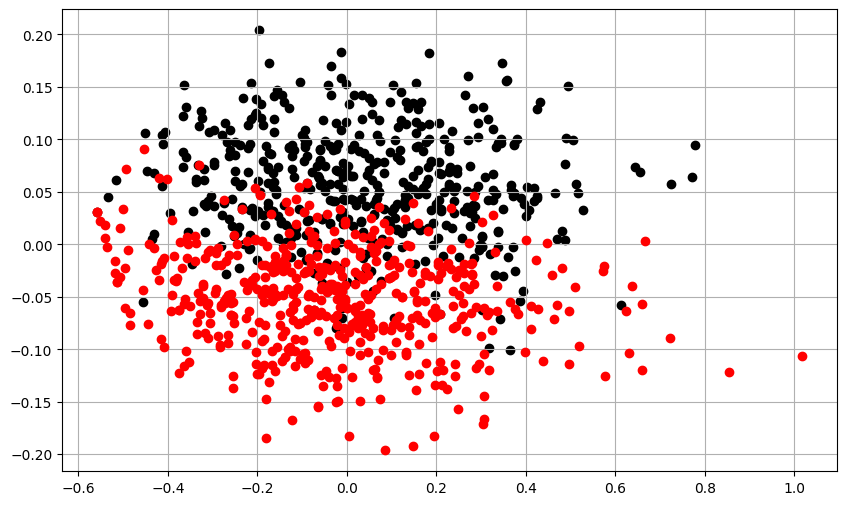

In [269]:
plt.figure(figsize=(10,6))
x_2=pca.fit_transform(x)
plt.plot(x_2[y==0,0],x_2[y==0,1],"or")
plt.scatter(x_2[y==1,0],x_2[y==1,1],c="black")
plt.grid(True)
plt.show()

TSNE

In [270]:
from sklearn.manifold import TSNE

In [271]:
x=np.array(data[['math score', 'reading score', 'writing score']])#3 стовбчики у х
y=np.array(data['gender'])#назву у у

In [272]:
array_max = []#нормалізація
col_names = [ 'math score', 'reading score', 'writing score']
for col in col_names:
    x_col = np.array(data[col])
    x_max = max(x_col)
    array_max.append(x_max)
max_values = np.array(array_max)
x_normalized = x / max_values
x=x_normalized

In [273]:
x_2 = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(x)

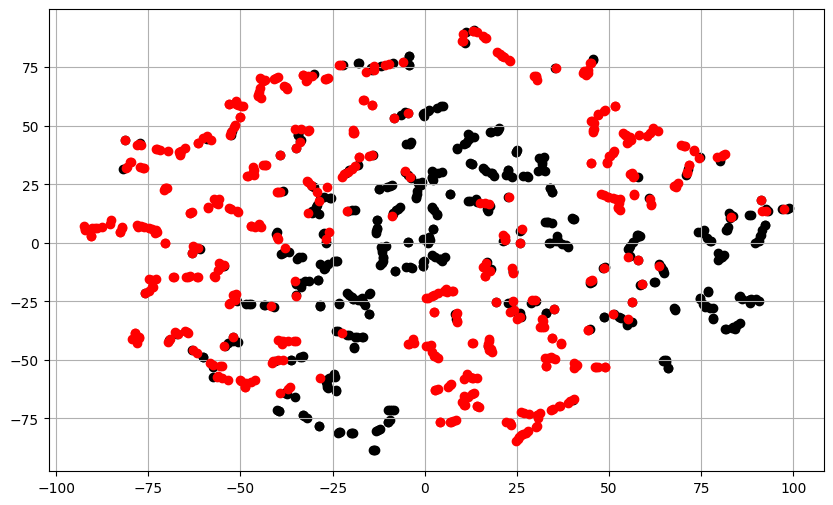

In [274]:
plt.figure(figsize=(10,6))
plt.plot(x_2[y==0,0],x_2[y==0,1],"or")
plt.scatter(x_2[y==1,0],x_2[y==1,1],c="black")
plt.grid(True)
plt.show()

K-means

In [275]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from sklearn.cluster import KMeans

from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

64 кольори

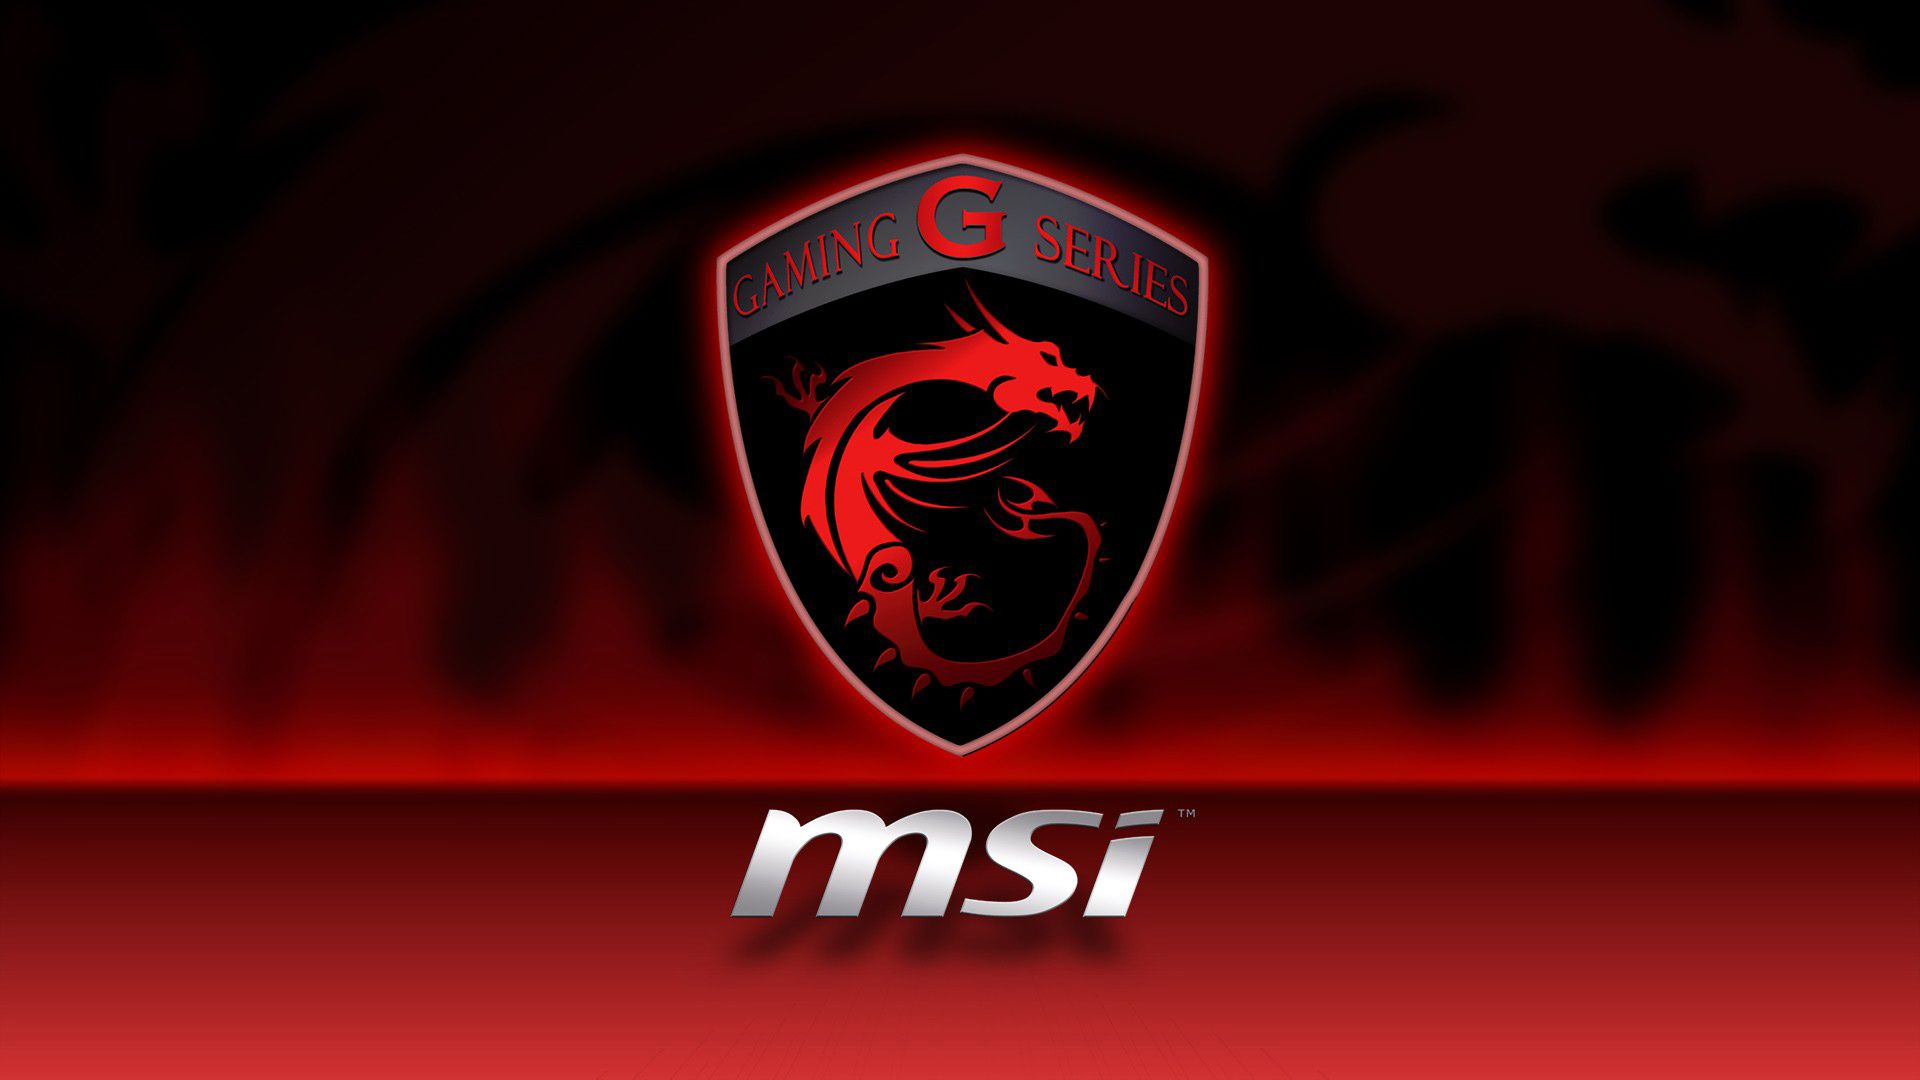

In [276]:
n_colors=64
navi = Image.open("msiLogo.jpg")
navi

In [277]:
navi = np.array(navi, dtype=np.float64) / 255

In [278]:
w, h, d = original_shape = tuple(navi.shape)
assert d == 3
image_array = np.reshape(navi, (w * h, d))

In [279]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1000)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(image_array_sample)

Fitting model on a small sub-sample of the data


Predicting color indices on the full image (k-means)


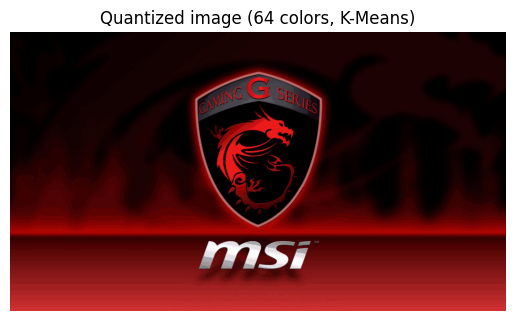

In [280]:


# Get labels for all points
print("Predicting color indices on the full image (k-means)")

labels = kmeans.predict(image_array)





def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image


plt.figure(1)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))



32

Fitting model on a small sub-sample of the data
Predicting color indices on the full image (k-means)


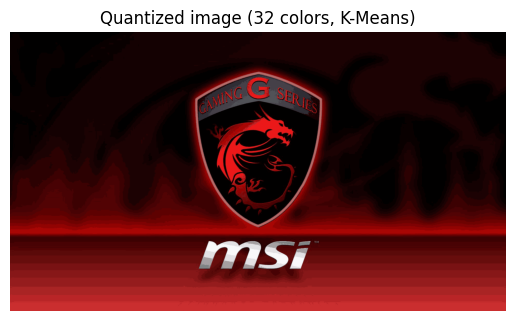

In [281]:
n_colors=32
navi = Image.open("msiLogo.jpg")
navi = np.array(navi, dtype=np.float64) / 255
w, h, d = original_shape = tuple(navi.shape)
assert d == 3
image_array = np.reshape(navi, (w * h, d))
print("Fitting model on a small sub-sample of the data")
image_array_sample = shuffle(image_array, random_state=0, n_samples=1000)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(image_array_sample)


# Get labels for all points
print("Predicting color indices on the full image (k-means)")
labels = kmeans.predict(image_array)

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image


plt.figure(1)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.show()

16

Fitting model on a small sub-sample of the data
Predicting color indices on the full image (k-means)


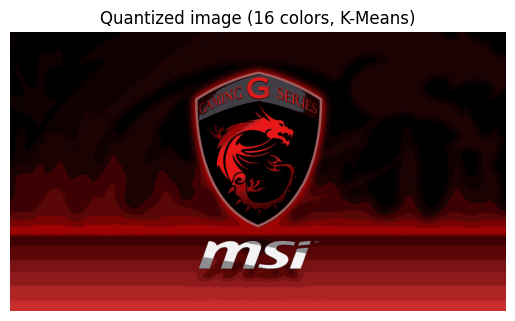

In [282]:
n_colors=16
navi = Image.open("msiLogo.jpg")
navi = np.array(navi, dtype=np.float64) / 255
w, h, d = original_shape = tuple(navi.shape)
assert d == 3
image_array = np.reshape(navi, (w * h, d))
print("Fitting model on a small sub-sample of the data")
image_array_sample = shuffle(image_array, random_state=0, n_samples=1000)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(image_array_sample)

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
labels = kmeans.predict(image_array)

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image


plt.figure(1)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))


8

Fitting model on a small sub-sample of the data
Predicting color indices on the full image (k-means)


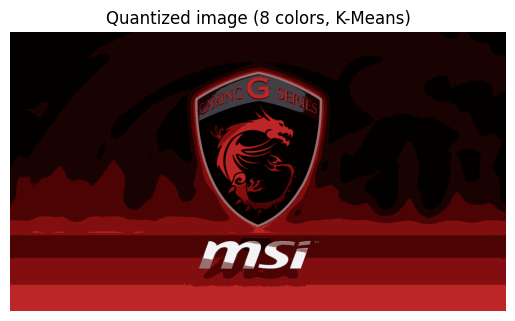

In [283]:
n_colors=8
navi = Image.open("msiLogo.jpg")
navi = np.array(navi, dtype=np.float64) / 255
w, h, d = original_shape = tuple(navi.shape)
assert d == 3
image_array = np.reshape(navi, (w * h, d))
print("Fitting model on a small sub-sample of the data")
image_array_sample = shuffle(image_array, random_state=0, n_samples=1000)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(image_array_sample)

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
labels = kmeans.predict(image_array)


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


plt.figure(1)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))



Обробка та класифікація текстових даних

In [284]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [285]:
df1 = pd.read_csv('test.csv')
df1.loc[df1["label"] == 0, "label"] = "sadness"
df1.loc[df1["label"] == 1, "label"] = "joy"
df1.loc[df1["label"] == 2, "label"] = "love"
df1.loc[df1["label"] == 3, "label"] = "anger"
df1.loc[df1["label"] == 4, "label"] = "fear"
df1.loc[df1["label"] == 4, "label"] = "noname"

In [286]:
df1.columns

Index(['text', 'label'], dtype='object')

In [287]:
from collections import Counter
Counter( df1['label'])

Counter({'sadness': 581,
         'joy': 695,
         'fear': 224,
         'anger': 275,
         'love': 159,
         5: 66})

In [288]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [289]:
for i in range (len(df1)):
  txt = df1.at[i, 'text']
  txt = (re.sub("[^A-Za-z']+", ' ', str(txt)).lower())
  txt = ' '.join([word for word in txt.split(' ') if word not in stop_words])
  df1.at[i,'text'] = txt


In [290]:
print(df1['text'])

0             im feeling rather rotten im ambitious right
1                            im updating blog feel shitty
2         never make separate ever want feel like ashamed
3       left bouquet red yellow tulips arm feeling sli...
4                                 feeling little vain one
                              ...                        
1995    keep feeling like someone unkind wrong think g...
1996    im feeling little cranky negative doctors appo...
1997    feel useful people gives great feeling achieve...
1998    im feeling comfortable derby feel though start...
1999    feel weird meet w people text like dont talk f...
Name: text, Length: 2000, dtype: object


In [291]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

from wordcloud import WordCloud

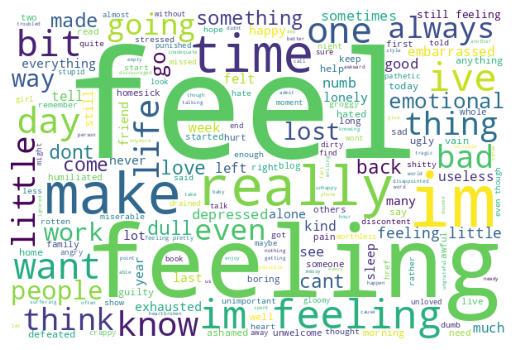

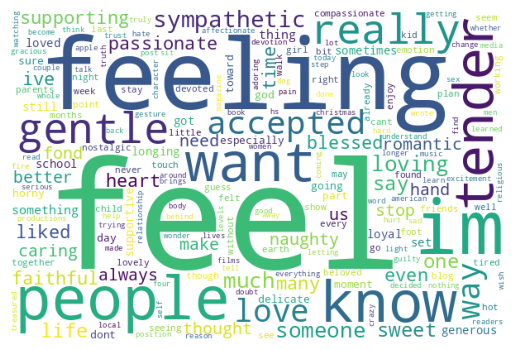

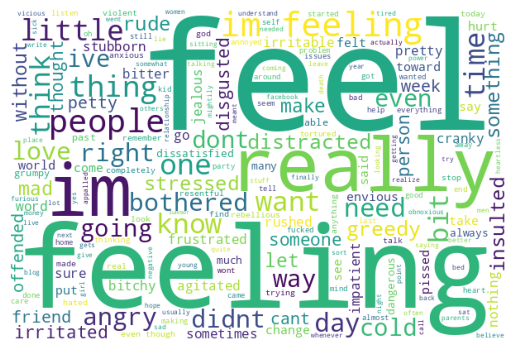

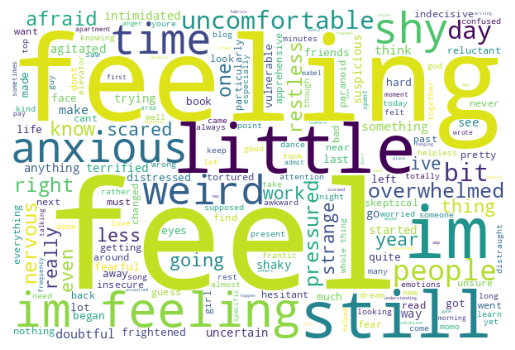

In [292]:
def visualize(label):
    text = ''
    for msg in df1[df1['label'] == label]['text']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('sadness')
visualize('love')
visualize('anger')
visualize('fear')




In [293]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1['text'], df1['label'], test_size=0.20)
y_train = y_train.astype(str)
y_test = y_test.astype(str)
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

In [294]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       0.33      0.33      0.33         9
       anger       0.67      0.63      0.65        51
        fear       0.70      0.67      0.68        45
         joy       0.70      0.78      0.74       146
        love       0.64      0.35      0.45        40
     sadness       0.73      0.76      0.74       109

    accuracy                           0.69       400
   macro avg       0.63      0.59      0.60       400
weighted avg       0.69      0.69      0.68       400



In [295]:
print(confusion_matrix(y_test, y_pred))

[[  3   0   3   3   0   0]
 [  0  32   4   8   0   7]
 [  1   2  30   7   1   4]
 [  4   7   2 114   6  13]
 [  1   2   1  15  14   7]
 [  0   5   3  17   1  83]]


In [296]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [297]:
vectorizer = TfidfVectorizer()


In [298]:
X_train, X_test, y_train, y_test = train_test_split(df1['text'], df1['label'], test_size=0.20)
y_train = y_train.astype(str)
y_test = y_test.astype(str)
vectorizer.fit(df1['text'])
x_train_Tfidf = vectorizer.transform(X_train)
x_test_Tfidf = vectorizer.transform(X_test)
print(x_test_Tfidf)

  (0, 4458)	0.1574883092992204
  (0, 3816)	0.22939497778428256
  (0, 3180)	0.5665408063718153
  (0, 3092)	0.5374936240503957
  (0, 2515)	0.5374936240503957
  (0, 1716)	0.14574282176385514
  (0, 1516)	0.05066684746111849
  (1, 4553)	0.2737894818825783
  (1, 4045)	0.25902961698415944
  (1, 3945)	0.2704282392163579
  (1, 2808)	0.3586869788303449
  (1, 2732)	0.23293338932795418
  (1, 2486)	0.30885829790725217
  (1, 1833)	0.30885829790725217
  (1, 1748)	0.2059598418624228
  (1, 1581)	0.34029669528284984
  (1, 1516)	0.06415614987761149
  (1, 968)	0.29581018407914955
  (1, 897)	0.40158356751588964
  (2, 4210)	0.23862804841581284
  (2, 4037)	0.18644973574999343
  (2, 3580)	0.2835449942954383
  (2, 3544)	0.2835449942954383
  (2, 3541)	0.22961734419023996
  (2, 3251)	0.25869268369974785
  :	:
  (397, 3870)	0.4389382328455746
  (397, 3137)	0.2890472829952022
  (397, 1517)	0.13066215942176804
  (397, 1069)	0.3585279084555671
  (397, 746)	0.41427136178999213
  (397, 571)	0.3585279084555671
  (398, 

In [299]:

from sklearn.svm import SVC
svc = SVC(C=1, gamma = 1, kernel = 'rbf')
svc.fit(x_train_Tfidf, y_train)
prediction = svc.predict(x_test_Tfidf)


print(confusion_matrix(y_test,prediction))

[[  0   1   0  13   0   1]
 [  0   4   0  47   0   8]
 [  0   0   5  40   0  11]
 [  0   0   0 116   0   2]
 [  0   0   0  28   1   1]
 [  0   0   0  46   0  76]]
